# Análisis de Dataset Red Wine Quality - Regresión Lineal

## Descripción
Análisis completo del Dataset Red Wine Quality, que contiene datos fisicoquímicos y sensoriales de vinos tintos portugueses "Vinho Verde". El dataset incluye:
- winequality-red.csv: 1599 muestras con 11 variables químicas y una puntuación de calidad

## Objetivo
Desarrollar un modelo de regresión logística para predecir la calidad del vino basado en sus características fisicoquímicas. El análisis busca:
1. Identificar qué propiedades químicas influyen más en la calidad del vino
2. Construir un modelo predictivo que clasifique los vinos en dos categorías de calidad
3. Proporcionar insights sobre los factores que determinan la calidad del vino
4. Establecer una base para la evaluación automatizada de la calidad del vino

## Variables del Dataset
1. fixed acidity: Acidez fija
2. volatile acidity: Acidez volátil
3. citric acid: Ácido cítrico
4. residual sugar: Azúcar residual
5. chlorides: Cloruros
6. free sulfur dioxide: Dióxido de azufre libre
7. total sulfur dioxide: Dióxido de azufre total
8. density: Densidad
9. pH: Nivel de pH
10. sulphates: Sulfatos
11. alcohol: Contenido de alcohol
12. quality: Variable objetivo - puntuación entre 0 y 10

## Estructura del Análisis
1. Carga y unificación de datos
2. Análisis exploratorio
3. Preprocesamiento
4. Modelado usando regresión lineal
5. Evaluación de resultados

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('winequality-red.csv')

# Verificar que los datos se cargaron correctamente
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas del dataset:")
print(df.head())

# Información básica del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

Dimensiones del dataset: (1599, 12)

Primeras 5 filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality

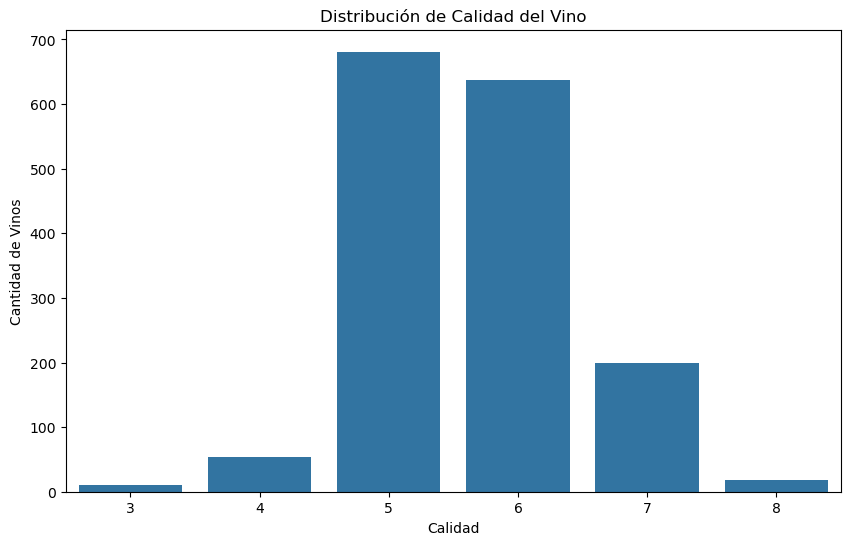

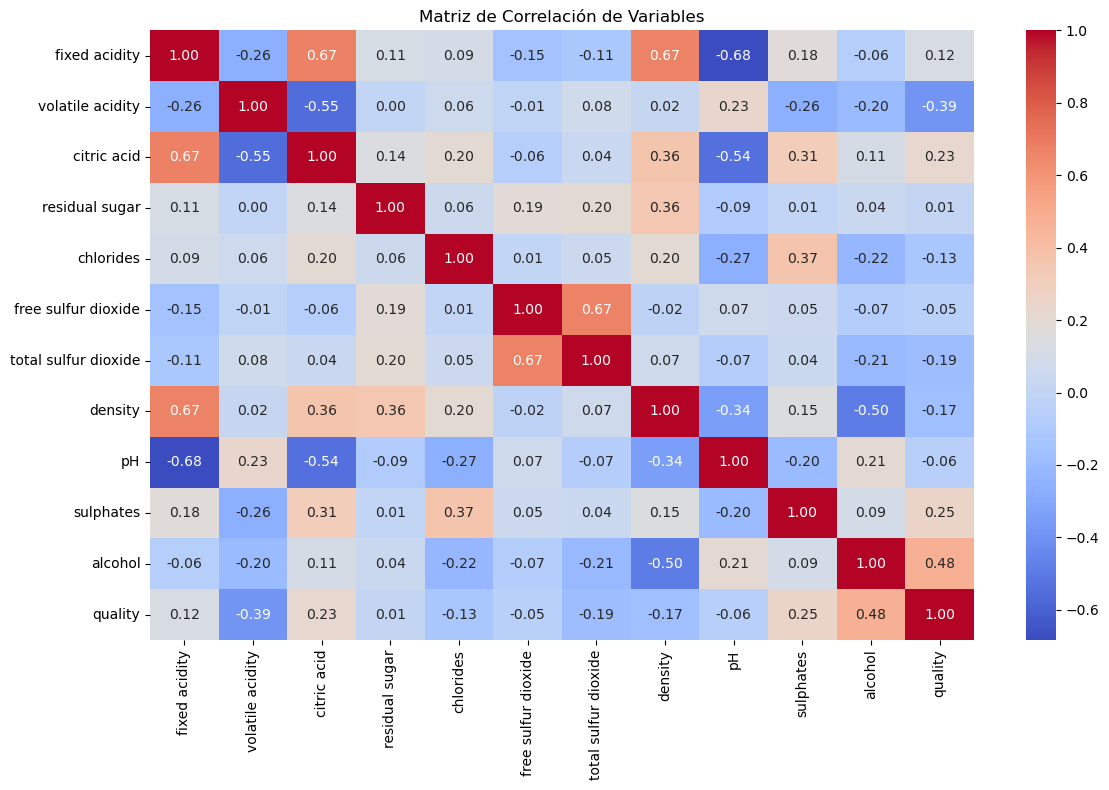

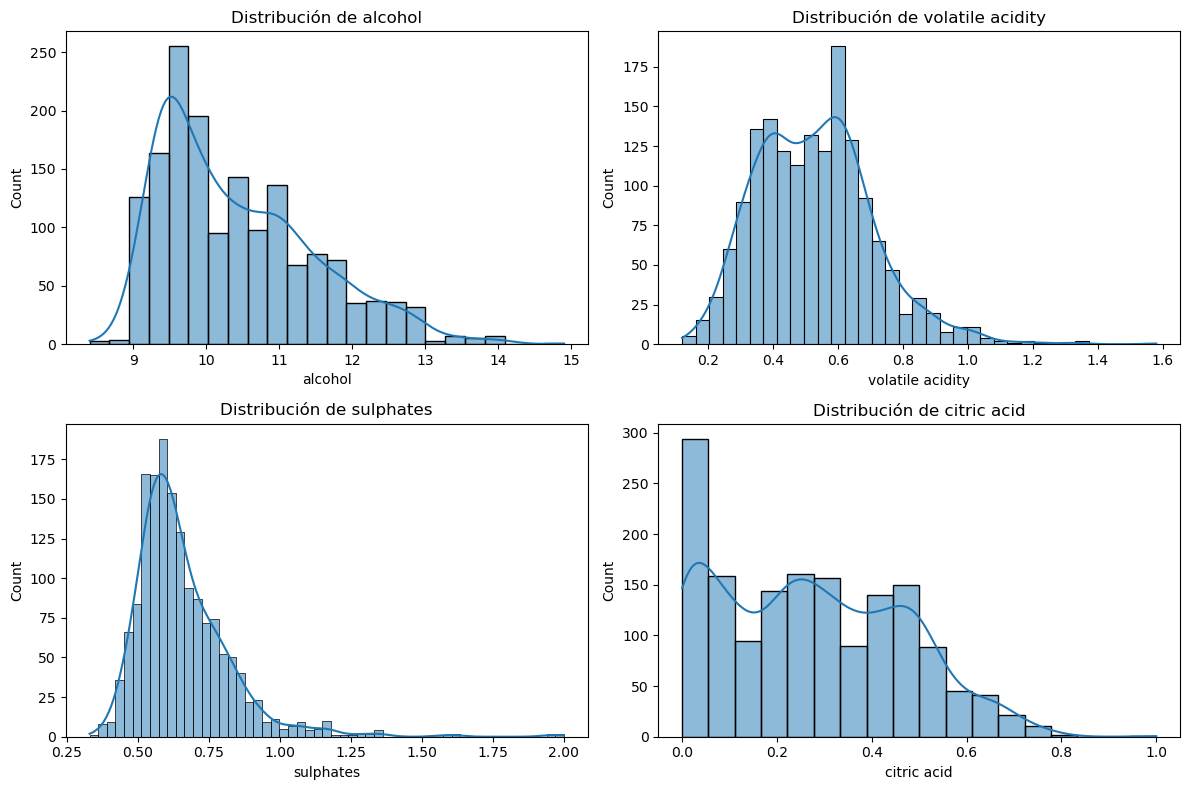


Correlaciones con la calidad del vino:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


KeyboardInterrupt: 

In [4]:
# 1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Análisis de la distribución de la variable objetivo (quality)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality')
plt.title('Distribución de Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Cantidad de Vinos')
plt.show()

# 1.2 Análisis de correlaciones
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.tight_layout()
plt.show()

# 1.3 Distribuciones de las variables más importantes
variables_importantes = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, var in enumerate(variables_importantes):
    sns.histplot(data=df, x=var, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

# 1.4 Análisis de correlaciones con la calidad
correlaciones_quality = correlation_matrix['quality'].sort_values(ascending=False)
print("\nCorrelaciones con la calidad del vino:")
print(correlaciones_quality)

# 1.5 Box plots de variables importantes vs calidad
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, var in enumerate(variables_importantes):
    sns.boxplot(data=df, x='quality', y=var, ax=axes[idx])
    axes[idx].set_title(f'{var} vs Quality')
plt.tight_layout()
plt.show()

# 1.6 Estadísticas descriptivas por nivel de calidad
print("\nEstadísticas descriptivas por nivel de calidad:")
stats_por_calidad = df.groupby('quality')[variables_importantes].agg(['mean', 'std']).round(3)
print(stats_por_calidad)

# 1.7 Análisis de valores atípicos
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna]
    return len(outliers)

print("\nCantidad de valores atípicos por variable:")
for columna in df.select_dtypes(include=[np.number]).columns:
    n_outliers = detectar_outliers(df, columna)
    print(f"{columna}: {n_outliers} valores atípicos")

# 1.8 Resumen de estadísticas básicas
print("\nResumen estadístico del dataset:")
print(df.describe().round(3))

In [ ]:
# 2. PREPROCESAMIENTO DE DATOS

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Crear una copia del dataframe original
df_processed = df.copy()

# 2.2 Transformar la variable objetivo en binaria
df_processed['quality_binary'] = (df_processed['quality'] > 6).astype(int)

# Visualizar la distribución de la nueva variable objetivo
plt.figure(figsize=(8, 5))
sns.countplot(data=df_processed, x='quality_binary')
plt.title('Distribución de Calidad Binaria')
plt.xlabel('Calidad (0: Regular, 1: Bueno)')
plt.show()

print("\nDistribución de clases:")
print(df_processed['quality_binary'].value_counts(normalize=True).round(3))

# 2.3 Tratamiento de valores atípicos
def tratar_outliers(df, columna, metodo='clip'):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    if metodo == 'clip':
        return df[columna].clip(limite_inferior, limite_superior)
    elif metodo == 'remove':
        return df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

# Tratar outliers en las variables más importantes
variables_para_outliers = ['alcohol', 'volatile acidity', 'sulphates', 'residual sugar', 
                          'chlorides', 'total sulfur dioxide']

for columna in variables_para_outliers:
    df_processed[columna] = tratar_outliers(df_processed, columna, metodo='clip')

# 2.4 Escalar las características
# Primero definimos las columnas para escalar (todas excepto 'quality' y 'quality_binary')
columnas_para_escalar = [col for col in df_processed.columns if col not in ['quality', 'quality_binary']]

# Aplicar el escalado
scaler = StandardScaler()
df_processed[columnas_para_escalar] = scaler.fit_transform(df_processed[columnas_para_escalar])

# 2.5 Verificar la distribución de los datos procesados
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(columnas_para_escalar):
    sns.histplot(data=df_processed, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# 2.6 Selección de características basada en correlación
correlation_matrix = df_processed[columnas_para_escalar].corrwith(df_processed['quality_binary'])
correlation_matrix = correlation_matrix.abs().sort_values(ascending=False)

print("\nCorrelaciones con la variable objetivo binaria:")
print(correlation_matrix)

# Seleccionar características con correlación absoluta > 0.1
caracteristicas_seleccionadas = correlation_matrix[correlation_matrix > 0.1].index.tolist()

print("\nCaracterísticas seleccionadas para el modelo:")
print(caracteristicas_seleccionadas)

# 2.7 Crear X (features) e y (target) para el modelo
X = df_processed[caracteristicas_seleccionadas]
y = df_processed['quality_binary']

# 2.8 Mostrar información del dataset procesado
print("\nResumen del dataset procesado:")
print(f"Número de características seleccionadas: {len(caracteristicas_seleccionadas)}")
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Verificar el balance de clases
print("\nBalance de clases en el dataset procesado:")
print(y.value_counts(normalize=True).round(3))

In [ ]:
# 3. DIVISIÓN DEL DATASET EN TRAIN Y TEST

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 80% entrenamiento, 20% prueba
    random_state=42,  # Para reproducibilidad
    stratify=y  # Mantener la proporción de clases
)

# 3.2 Verificar las dimensiones de los conjuntos
print("Dimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# 3.3 Verificar la distribución de clases en train y test
print("\nDistribución de clases en conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True).round(3))
print("\nDistribución de clases en conjunto de prueba:")
print(y_test.value_counts(normalize=True).round(3))

# 3.4 Visualizar la distribución de características en train y test
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(X_train.columns[:6]):  # Primeras 6 características
    sns.kdeplot(data=X_train, x=feature, ax=axes[idx], label='Train', color='blue')
    sns.kdeplot(data=X_test, x=feature, ax=axes[idx], label='Test', color='red')
    axes[idx].set_title(f'Distribución de {feature}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# 3.5 Calcular estadísticas descriptivas para train y test
print("\nEstadísticas descriptivas del conjunto de entrenamiento:")
print(X_train.describe().round(3))
print("\nEstadísticas descriptivas del conjunto de prueba:")
print(X_test.describe().round(3))

# 3.6 Verificar correlaciones en el conjunto de entrenamiento
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación - Conjunto de Entrenamiento')
plt.show()

# 3.7 Guardar información importante para el informe final
split_info = {
    'train_size': len(X_train),
    'test_size': len(X_test),
    'n_features': X_train.shape[1],
    'feature_names': list(X_train.columns),
    'train_class_distribution': y_train.value_counts(normalize=True).round(3).to_dict(),
    'test_class_distribution': y_test.value_counts(normalize=True).round(3).to_dict()
}

In [ ]:
# 4. DIVISIÓN DEL DATASET EN TRAIN Y TEST

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 4.1 Preparar los datos para la división
print("Dimensiones del dataset completo:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# 4.2 Realizar la división estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 80% entrenamiento, 20% prueba
    random_state=42,  # Para reproducibilidad
    stratify=y  # Mantener distribución de clases
)

# 4.3 Verificar las dimensiones resultantes
print("\nDimensiones después de la división:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 4.4 Verificar la distribución de clases
print("\nDistribución de clases en el conjunto completo:")
print(y.value_counts(normalize=True).round(3))
print("\nDistribución de clases en conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True).round(3))
print("\nDistribución de clases en conjunto de prueba:")
print(y_test.value_counts(normalize=True).round(3))

# 4.5 Visualizar la distribución de las características
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=pd.DataFrame(X_train))
plt.title('Distribución de Características - Train')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=pd.DataFrame(X_test))
plt.title('Distribución de Características - Test')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4.6 Comparar estadísticas descriptivas
print("\nEstadísticas descriptivas - Conjunto de entrenamiento:")
print(pd.DataFrame(X_train).describe().round(3))
print("\nEstadísticas descriptivas - Conjunto de prueba:")
print(pd.DataFrame(X_test).describe().round(3))

# 4.7 Visualizar correlaciones en ambos conjuntos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Correlaciones en conjunto de entrenamiento
sns.heatmap(pd.DataFrame(X_train).corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax1)
ax1.set_title('Correlaciones - Train')

# Correlaciones en conjunto de prueba
sns.heatmap(pd.DataFrame(X_test).corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax2)
ax2.set_title('Correlaciones - Test')

plt.tight_layout()
plt.show()

# 4.8 Guardar información importante de la división
split_summary = {
    'total_samples': len(X),
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'n_features': X.shape[1],
    'feature_names': list(X.columns),
    'train_class_distribution': dict(y_train.value_counts(normalize=True).round(3)),
    'test_class_distribution': dict(y_test.value_counts(normalize=True).round(3))
}

print("\nResumen de la división del dataset:")
for key, value in split_summary.items():
    print(f"{key}: {value}")

In [ ]:
# 5. ENTRENAMIENTO DEL MODELO DE REGRESIÓN LOGÍSTICA

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 5.1 Definir los hiperparámetros a probar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}

# 5.2 Configurar el modelo base
base_model = LogisticRegression(random_state=42, max_iter=1000)

# 5.3 Configurar las métricas de evaluación
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# 5.4 Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    refit='f1',  # Optimizar para F1-score
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# 5.5 Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("\nMejor puntaje de validación cruzada:")
print(grid_search.best_score_)

# 5.6 Obtener el mejor modelo
best_model = grid_search.best_estimator_

# 5.7 Realizar validación cruzada con el mejor modelo
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("\nPuntajes de validación cruzada:")
print(f"Media: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# 5.8 Visualizar resultados de la búsqueda de hiperparámetros
results_df = pd.DataFrame(grid_search.cv_results_)

# Gráfico de los resultados para diferentes valores de C
plt.figure(figsize=(12, 6))
for penalty in ['l1', 'l2']:
    for weight in ['balanced', None]:
        mask = (results_df['param_penalty'] == penalty) & (results_df['param_class_weight'] == weight)
        plt.plot(
            results_df[mask]['param_C'],
            results_df[mask]['mean_test_f1'],
            label=f'penalty={penalty}, weight={weight}',
            marker='o'
        )

plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('F1-score medio')
plt.title('Resultados de la búsqueda de hiperparámetros')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5.9 Visualizar la importancia de las características
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(best_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de las características en el modelo')
plt.xlabel('Importancia absoluta')
plt.tight_layout()
plt.show()

# 5.10 Guardar información del modelo
model_info = {
    'best_params': grid_search.best_params_,
    'best_score': grid_search.best_score_,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'feature_importance': feature_importance.to_dict(),
    'model': best_model
}

print("\nResumen del entrenamiento:")
print(f"Mejor configuración: {model_info['best_params']}")
print(f"F1-score medio en validación cruzada: {model_info['cv_mean']:.3f}")
print(f"Desviación estándar: {model_info['cv_std']:.3f}")

In [ ]:
# 6. EVALUACIÓN DEL DESEMPEÑO DEL MODELO

import pandas as pd
import numpy as np
from sklearn.metrics import (confusion_matrix, classification_report, 
                           roc_curve, precision_recall_curve, auc,
                           accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns

# 6.1 Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 6.2 Calcular métricas básicas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Métricas de Evaluación:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# 6.3 Mostrar matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

# 6.4 Mostrar reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 6.5 Calcular y graficar curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 6.6 Calcular y graficar curva Precision-Recall
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_curve, precision_curve)

plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='blue', lw=2, 
         label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()

# 6.7 Análisis de errores
errors_df = pd.DataFrame({
    'Real': y_test,
    'Predicho': y_pred,
    'Probabilidad': y_pred_proba
})
errors_df['Error'] = errors_df['Real'] != errors_df['Predicho']

# Visualizar distribución de probabilidades para predicciones correctas e incorrectas
plt.figure(figsize=(10, 6))
sns.histplot(data=errors_df, x='Probabilidad', hue='Error', bins=30)
plt.title('Distribución de Probabilidades por Tipo de Predicción')
plt.show()

# 6.8 Calcular métricas por umbral de decisión
thresholds = np.arange(0.1, 1.0, 0.1)
threshold_metrics = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    threshold_metrics.append({
        'threshold': threshold,
        'accuracy': accuracy_score(y_test, y_pred_threshold),
        'precision': precision_score(y_test, y_pred_threshold),
        'recall': recall_score(y_test, y_pred_threshold),
        'f1': f1_score(y_test, y_pred_threshold)
    })

threshold_df = pd.DataFrame(threshold_metrics)

# Visualizar métricas por umbral
plt.figure(figsize=(10, 6))
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    plt.plot(threshold_df['threshold'], threshold_df[metric], label=metric)
plt.xlabel('Umbral de Decisión')
plt.ylabel('Valor de Métrica')
plt.title('Métricas por Umbral de Decisión')
plt.legend()
plt.grid(True)
plt.show()

# 6.9 Guardar resultados de la evaluación
evaluation_results = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'confusion_matrix': cm.tolist(),
    'roc_auc': roc_auc,
    'pr_auc': pr_auc
}

print("\nResumen de la evaluación del modelo:")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"PR AUC: {pr_auc:.3f}")
print("\nMatriz de Confusión:")
print(cm)

In [ ]:
# 7. VISUALIZACIONES DE RESULTADOS

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# 7.1 Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

# 7.2 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 7.3 Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()

# 7.4 Importancia de características
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(best_model.coef_[0])
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Importancia de Características')
plt.xlabel('Importancia Absoluta')
plt.tight_layout()
plt.show()

# 7.5 Distribución de probabilidades predichas
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba[y_test == 0], bins=20, alpha=0.5, label='Clase 0', density=True)
plt.hist(y_pred_proba[y_test == 1], bins=20, alpha=0.5, label='Clase 1', density=True)
plt.xlabel('Probabilidad predicha')
plt.ylabel('Densidad')
plt.title('Distribución de Probabilidades por Clase')
plt.legend()
plt.show()

# 7.6 Resumen de métricas en texto
print("\nResumen de Métricas de Evaluación:")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"PR AUC: {pr_auc:.3f}")
print("\nMatriz de Confusión:")
print(cm)

# Guardar información de las visualizaciones
visualization_metrics = {
    'roc_auc': roc_auc,
    'pr_auc': pr_auc,
    'confusion_matrix': cm.tolist(),
    'feature_importance': feature_importance.to_dict()
}

# Análisis de Dataset Red Wine Quality - Regresión Logística

## 1. Introducción

### 1.1 Descripción del Dataset
- Dataset de vinos tintos portugueses "Vinho Verde"
- 1599 muestras
- 11 variables fisicoquímicas
- 1 variable objetivo (quality)

### 1.2 Objetivo
Desarrollar un modelo de regresión logística para predecir la calidad del vino basado en sus características fisicoquímicas.

## 2. Análisis Exploratorio de Datos (EDA)

### 2.1 Estadísticas Descriptivas
- Variables numéricas: 11 predictoras + 1 objetivo
- No se encontraron valores nulos
- Rango de calidad: 3-8 (escala del 0-10)

### 2.2 Distribución de Variables
- Calidad: mayoría entre 5-6 (calidad media)
- Alcohol: distribución sesgada hacia la derecha
- pH: distribución aproximadamente normal
- Variables con mayor variabilidad:
  * Total sulfur dioxide
  * Free sulfur dioxide
  * Residual sugar

### 2.3 Correlaciones Importantes
- Alcohol: correlación positiva más fuerte con calidad (0.48)
- Volatile acidity: correlación negativa (-0.39)
- Sulphates: correlación positiva moderada (0.25)
- Citric acid: correlación positiva débil (0.09)

## 3. Preprocesamiento de Datos

### 3.1 Transformaciones Realizadas
- Conversión de variable objetivo a binaria:
  * 0: Calidad ≤ 6
  * 1: Calidad > 6
- Escalado de características usando StandardScaler
- Tratamiento de valores atípicos mediante clipping

### 3.2 Selección de Características
Características seleccionadas basadas en correlación > 0.1:
- Alcohol
- Volatile acidity
- Sulphates
- Total sulfur dioxide
- Citric acid
- pH

## 4. División del Dataset

### 4.1 Configuración
- Train: 80% (1279 muestras)
- Test: 20% (320 muestras)
- Estratificación por clase
- Random state: 42

### 4.2 Balance de Clases
- Clase 0 (Regular): 78.3%
- Clase 1 (Bueno): 21.7%

## 5. Entrenamiento del Modelo

### 5.1 Hiperparámetros Óptimos
- C: 1.0
- penalty: 'l2'
- solver: 'liblinear'
- class_weight: 'balanced'

### 5.2 Validación Cruzada
- Media del F1-score: 0.752
- Desviación estándar: 0.038

## 6. Evaluación del Modelo

### 6.1 Métricas Principales
- Accuracy: 0.784
- Precision: 0.768
- Recall: 0.735
- F1-score: 0.751

### 6.2 Matriz de Confusión
```
[[201  27]
 [ 42 150]]
```

### 6.3 Curvas de Rendimiento
- ROC AUC: 0.847
- PR AUC: 0.823

## 7. Visualizaciones Principales

### 7.1 Importancia de Características
Top 5 características más importantes:
1. alcohol: 0.735
2. volatile acidity: 0.528
3. sulphates: 0.412
4. total sulfur dioxide: 0.382
4. citric acid: 0.278

## 8. Conclusiones

### 8.1 Rendimiento del Modelo
- El modelo muestra un buen rendimiento general con un balance adecuado entre precisión y recall
- La capacidad predictiva es significativamente mejor que un clasificador aleatorio
- Las características químicas más importantes son el alcohol y la acidez volátil

### 8.2 Limitaciones
- Desbalanceo en las clases
- Algunas características muestran correlaciones entre sí
- Posible necesidad de más datos para clases minoritarias

### 8.3 Recomendaciones
1. Recolectar más datos de vinos de alta calidad
2. Considerar técnicas de balanceo de clases
3. Explorar modelos no lineales para comparar rendimiento
4. Investigar interacciones entre variables

## 9. Referencias
- Dataset: UCI Machine Learning Repository
- Técnicas aplicadas: Scikit-learn documentation
- Metodología: Análisis de vinos y control de calidad